In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#df = pd.read_csv('./../dat/ev.IFN.txt', sep='\t')
#dfa = pd.read_csv('./../dat/ev.IFN_c.txt', sep='\t')
dfa = pd.read_csv("./../dat/ev_nce_c.txt", sep="\t")
#dfa = pd.read_csv("./../dat/evidence_elite_c.txt", sep="\t")
dfa

,sequence,raw_file,retention_time,pep,exclude,input_id,exp_id,peptide_id
0,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55D,27.8270,2.438300e-01,True,0,3,0
1,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55E,27.6960,2.493000e-01,True,0,4,0
2,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55F,27.6390,2.493000e-01,True,0,5,0
3,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55G,27.4780,2.493000e-01,True,0,6,0
4,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55H,27.8360,3.805700e-01,True,0,7,0
5,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57A,23.8220,9.898900e-02,False,1,14,0
6,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57B,23.7750,3.784200e-01,False,1,15,0
7,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57E,23.8680,2.239900e-01,False,1,18,0
8,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57F,23.8620,1.727400e-01,False,1,19,0
9,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57G,23.8870,1.676700e-01,False,1,20,0


In [8]:
#dfa.iloc[dfa["exclude"]]
#dfa.iloc[1]
dff = dfa[-(dfa["exclude"])]
dff = dff.reset_index(drop=True)
dff.shape[0]

50614

In [9]:
dff["stan_peptide_id"] = dff["sequence"].map({ind: val for val, ind in enumerate(dff["sequence"].unique())})
print(dff["stan_peptide_id"].max())
print(len(dff["sequence"].unique()))

3568
3569


In [11]:
#eidx = dff["raw_file"].unique()
#dff["exp_id"] = [np.where(eidx==x)[0][0] for x in dff["raw_file"]]
exp_names = np.sort(dff["raw_file"].unique())
num_experiments = len(exp_names)
num_observations = dff.shape[0]
num_peptides = dff["stan_peptide_id"].max() + 1

print(num_experiments)
print(dff["exp_id"].max())
print(dff["peptide_id"].max())
print(dff["stan_peptide_id"].max())

53
52
22695
3568


In [12]:
pep_exp_all = dff["stan_peptide_id"].map(str) + " - " + dff["exp_id"].map(str)
pep_exp_pairs = pep_exp_all.unique()
num_pep_exp_pairs = len(pep_exp_pairs)
print(len(pep_exp_all))
print(len(pep_exp_all.unique()))

50614
46852


In [13]:
muij_map = pep_exp_all.map({ind: val for val, ind in enumerate(pep_exp_pairs)})

In [14]:
splt = pd.Series(pep_exp_pairs).str.split(" - ")
muij_to_pep = splt.str.get(0).map(int)
muij_to_exp = splt.str.get(1).map(int)

In [15]:
# build dictionary of data to feed to STAN
# revert all data to primitive types to avoid problems later
# STAN code is all 1-indexed, so add 1 to all indexed forms of data
stan_data = {
    "num_experiments": num_experiments,
    "num_peptides": num_peptides,
    "num_pep_exp_pairs": num_pep_exp_pairs,
    "num_total_observations": num_observations,
    "muij_map": muij_map+1,
    "muij_to_pep": (muij_to_pep+1).tolist(),
    "muij_to_exp": (muij_to_exp+1).tolist(),
    "experiment_id": (dff["exp_id"]+1).tolist(),
    "peptide_id": (dff["stan_peptide_id"]+1).tolist(),
    "retention_times": dff["retention_time"].tolist(),
    "mean_log_rt": np.mean(np.log(dff["retention_time"])),
    "sd_log_rt": np.std(np.log(dff["retention_time"])),
    "mean_rt": np.mean(dff["retention_time"]),
    "sd_rt": np.std(dff["retention_time"]),
    "pep": dff["pep"].tolist(),
    "max_retention_time": dff["retention_time"].max()
}

print(stan_data["num_total_observations"])
print(stan_data["num_pep_exp_pairs"])

50614
46852


In [25]:
# get the average retention time for a peptide, weighting by PEP
filter_pep = 0.5
rt_distortion = 0
def get_mu(x):
  weights = ((1 - x["pep"].values) - (1 - filter_pep)) / filter_pep
  return np.sum(x["retention_time"].values * weights) / np.sum(weights)

# apply the get_mu function on all peptides and add some distortion
mu_init = dff.groupby("stan_peptide_id")[["pep", "retention_time"]].apply(get_mu).values + np.random.normal(0, rt_distortion, num_peptides)
mu_init

array([23.85057928, 41.17849399, 26.09098695, ..., 17.9679468 ,
       32.8372037 , 53.11555115])

In [26]:
mu_min = 1
# negative or very low retention times not allowed. floor at 5 minutes
mu_init[mu_init <= mu_min] = mu_min
# canonical retention time shouldn't be bigger than largest real RT
mu_max = dff["retention_time"].max()
mu_init[mu_init > mu_max] = mu_max
print(mu_init.min())
print(mu_init.max())

7.806399999999999
111.9939999287385


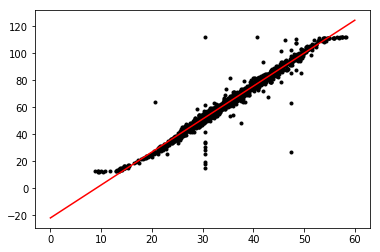

In [130]:
np.where(exp_names == "180308S_QC_SQC61A")[0][0]

exp = 25
plt.plot(mu_init[dff["stan_peptide_id"][dff["exp_id"]==exp]], dff["retention_time"][dff["exp_id"]==exp], '.k')
plt.plot([0, 60], [beta_init[0][exp], beta_init[0][exp] + beta_init[1][exp] * 60], '-r')
plt.show()

In [53]:
# take retention times and distort
rt_distorted = dff["retention_time"] + np.random.normal(0, rt_distortion, len(dff["retention_time"]))
# make sure distorted retention times stay within bounds of real ones
rt_distorted[rt_distorted > dff["retention_time"].max()] = dff["retention_time"].max()
rt_distorted[rt_distorted < dff["retention_time"].min()] = dff["retention_time"].min()
print(rt_distorted.min())
print(rt_distorted.max())

2.0181
177.53


In [54]:
# initialize priors for the segmented linear regression
# first element of vector is beta_0, or the intercept
# second element is beta_1 and beta_2, the slopes of the two segments
beta_init = np.array((np.repeat(10, num_experiments), np.repeat(1, num_experiments)), dtype=float)

In [127]:
prior_iters = 15
print("Optimizing priors with linear approximation for", prior_iters, "iterations.")
mu_pred = np.zeros(num_peptides)
# temporary data frame to quickly map over in the loop
dft = pd.DataFrame(dict(stan_peptide_id=dff["stan_peptide_id"], exp_id=dff["exp_id"], pep=dff["pep"], retention_time=mu_init[dff["stan_peptide_id"]]))

for i in range(0, prior_iters):
    # for each experiment, fit a simple linear regression
    # between the distorted RTs and the initial canonical retention times
    for j in np.sort(dff["exp_id"].unique()):
        idx     = (dff["exp_id"] == j)
        rt_cur  = rt_distorted[idx]
        mu_cur  = mu_init[dff["stan_peptide_id"][idx]]
        pep_cur = dff["pep"][idx]
        
        # for this experiment, run a linear regression (1 degree polyfit)
        # of the mus and the distorted RTs. store the linear regression params
        m, c = np.polyfit(mu_cur, rt_cur, 1, w=(1 - pep_cur))
        beta_init[(0,1), j] = [c, m]

    # calculate new set of canonical RTs based on linear regression params
    mu_pred = (rt_distorted - beta_init[0][dff["exp_id"]]) / beta_init[1][dff["exp_id"]] 
    # make sure new canonical RTs are within same range as distorted RTs
    mu_pred[mu_pred <= 0] = rt_distorted.min()
    mu_pred[mu_pred >= rt_distorted.max()] = rt_distorted.max()
    dft["retention_time"] = np.copy(mu_pred)

    mu_prev = np.copy(mu_init)

    # new set of priors for canonical RTs based on weighted combination of
    # this set of predicted canonical RTs
    mu_init = dft.groupby("stan_peptide_id")[["pep", "retention_time"]].apply(get_mu).values

    print("Iter", i+1, "| Avg. error:", "{:.5f}".format(pow(np.sum(mu_prev - mu_init), 2) / num_peptides))
#c, m = np.polyfit(mu_cur, rt_cur, 1, w=1-pep_cur)
#plt.plot(mu_cur, rt_cur, '.')
#plt.plot(mu_cur, m + mu_cur * c, 'r')

Optimizing priors with linear approximation for 15 iterations.
Iter 1 | Avg. error: 0.01933
Iter 2 | Avg. error: 0.00557
Iter 3 | Avg. error: 0.00025
Iter 4 | Avg. error: 0.00074
Iter 5 | Avg. error: 0.00468
Iter 6 | Avg. error: 0.00849
Iter 7 | Avg. error: 0.01268
Iter 8 | Avg. error: 0.01661
Iter 9 | Avg. error: 0.02017
Iter 10 | Avg. error: 0.02329
Iter 11 | Avg. error: 0.02598
Iter 12 | Avg. error: 0.02827
Iter 13 | Avg. error: 0.03018
Iter 14 | Avg. error: 0.03177
Iter 15 | Avg. error: 0.03308


In [21]:
# grab linear regression params
# set beta_2 (slope of second segment) to the same as the slope of the 1st segment
beta_0 = beta_init[0]
beta_1 = beta_init[1]
beta_2 = np.copy(beta_1)

# apply lower bound of (-1.0 * min(beta_1) * min(muInit)) to beta_0
# where (-1.0 * min(beta_1) * min(muInit)) is the lowest possible intercept
# given the lowest possible mu and lowest possible beta_1
beta_0[beta_0 <= (-1 * beta_1.min() * mu_init.min())] = (-1 * beta_1.min() * mu_init.min()) + 1e-3

# apply upper bound to prior canonical RTs
mu_init[mu_init >= dff["retention_time"].max()] = 0.95 * dff["retention_time"].max()

# create prior list for STAN
init_list = {
    "mu": mu_init,
    "beta_0": beta_0,
    "beta_1": beta_1,
    "beta_2": beta_2,
    "sigma_slope": np.repeat(0.1, num_experiments),
    "sigma_intercept": np.repeat(0.1, num_experiments),
    "split_point": np.repeat(np.median(mu_init), num_experiments)
}
#print(init_list)
print(beta_0.min())
print(mu_init.min())
print(beta_1.min())
print((mu_init.min() * beta_1.min()) + beta_0.min())

-0.5344279372491396
0.5991684289186544
0.8936184074575657
0.0010000000000000009


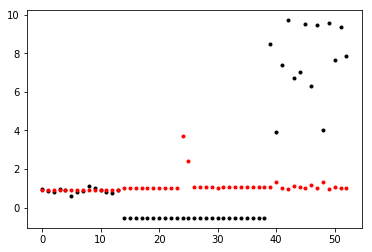

In [150]:
plt.plot(beta_0, '.k')
plt.plot(beta_1, '.r')

In [22]:
import pickle
sm = pickle.load(open("cached-model-fitRT3dstan-f420ba5592020346efd363002b0b73f9.pkl", "rb"))
sm

In [23]:
import pystan
import time
start = time.time()
op = sm.optimizing(data=stan_data, init=init_list, iter=5e4, verbose=True)
print("STAN Model Finished. Run time: ", time.time() - start, " seconds.")

/Users/albert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


STAN Model Finished. Run time:  375.92769980430603  seconds.


In [24]:
exp_params = pd.DataFrame({ key: op[key] for key in ["beta_0", "beta_1", "beta_2", "split_point", "sigma_slope", "sigma_intercept"]})
pair_params = pd.DataFrame({ key: op[key] for key in ["muij", "sigma_ij"]})
peptide_params = pd.DataFrame({ key: op[key] for key in ["mu"]})

# add exp_id to exp_params
exp_params["exp_id"] = np.sort(dff["exp_id"].unique())

pair_params = pair_params.assign(muij_to_pep=muij_to_pep)
pair_params = pair_params.assign(muij_to_exp=muij_to_exp)
#pair_params

In [257]:
exp_params.to_csv("./exp_params.txt", sep="\t", index=False)
pair_params.to_csv("./pair_params.txt", sep="\t", index=True, index_label="pair_id")
peptide_params.to_csv("./peptide_params.txt", sep="\t", index=True, index_label="peptide_id")

-2.4732065189336367

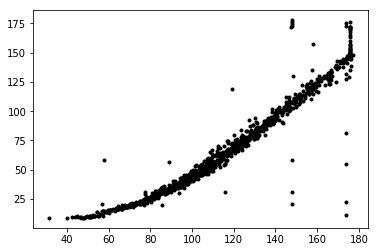

In [140]:
exp = 24
exp_indices = muij_to_exp==exp
plt.plot(pair_params["muij"][muij_map][exp_indices[muij_map]], dff["retention_time"].values[exp_indices[muij_map]], '.k')
plt.plot([0, exp_params["split_point"][exp], exp_params["beta_0"][exp]

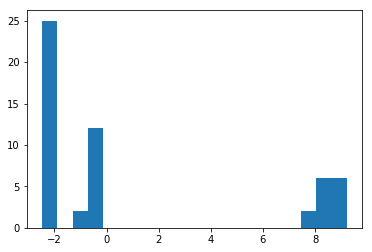

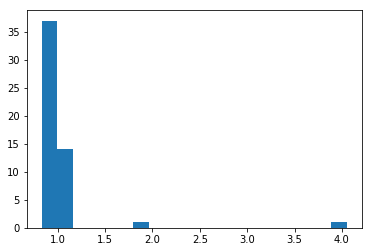

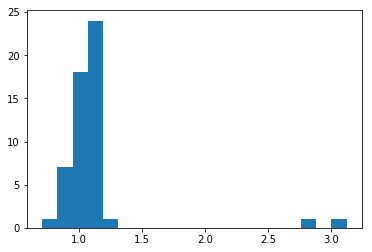

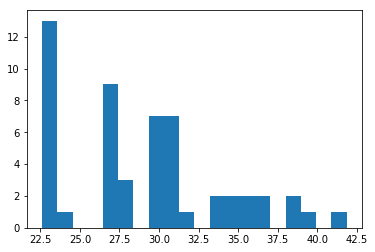

In [145]:
plt.hist(exp_params["beta_0"], bins=20)
plt.show()
plt.hist(exp_params["beta_1"], bins=20)
plt.show()
plt.hist(exp_params["beta_2"], bins=20)
plt.show()
plt.hist(exp_params["split_point"], bins=20)
plt.show()

In [165]:
a = np.random.normal(0, 10, 100)
#print(a)
#print(a < 0)
#~np.repeat(True, 10)

[True, False, True] or [True, False, False]

[True, False, True]

In [185]:
np.reshape(dff.groupby(["exp_id"])[["retention_time"]].max().values, (1, num_experiments))

array([[ 53.099,  57.274,  52.741,  56.32 ,  53.062,  57.165,  53.052,
         53.082,  46.765,  50.64 ,  57.48 ,  56.748,  52.937,  57.076,
         56.393,  58.973,  56.246,  56.515,  59.754,  59.767,  53.02 ,
         59.822,  56.506,  56.762, 177.53 , 111.88 ,  56.952,  53.127,
         53.141,  59.44 ,  53.153,  57.071,  57.53 ,  57.066,  57.054,
         57.032,  57.129,  57.001,  56.984,  59.841,  59.878,  55.061,
         55.965,  42.687,  59.799,  59.671,  59.873,  59.997,  59.983,
         58.963,  46.588,  59.858,  53.835]])

In [188]:
len(exp_names[0])

17